In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #gpu or cpu
print(f"Using device: {device}")

Using device: cuda


In [15]:
# Transform images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),  # mean for RGB
                         (0.5, 0.5, 0.5))  # std for RGB
])

# Load train and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [19]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 32x32x3 → 32x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # 32x32x32 → 16x16x32

            nn.Conv2d(32, 64, kernel_size=3, padding=1),# 16x16x32 → 16x16x64
            nn.ReLU(),
            nn.MaxPool2d(2, 2)                          # 16x16x64 → 8x8x64
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*8*8, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

model = SimpleCNN().to(device)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
for epoch in range(25):
    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.3f}")

Epoch 1, Loss: 0.059
Epoch 2, Loss: 0.051
Epoch 3, Loss: 0.049
Epoch 4, Loss: 0.041
Epoch 5, Loss: 0.044
Epoch 6, Loss: 0.044
Epoch 7, Loss: 0.039
Epoch 8, Loss: 0.036
Epoch 9, Loss: 0.037
Epoch 10, Loss: 0.038
Epoch 11, Loss: 0.034
Epoch 12, Loss: 0.034
Epoch 13, Loss: 0.035
Epoch 14, Loss: 0.032
Epoch 15, Loss: 0.029
Epoch 16, Loss: 0.030
Epoch 17, Loss: 0.027
Epoch 18, Loss: 0.028
Epoch 19, Loss: 0.029
Epoch 20, Loss: 0.027
Epoch 21, Loss: 0.032
Epoch 22, Loss: 0.025
Epoch 23, Loss: 0.023
Epoch 24, Loss: 0.033
Epoch 25, Loss: 0.023


In [25]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 71.04%


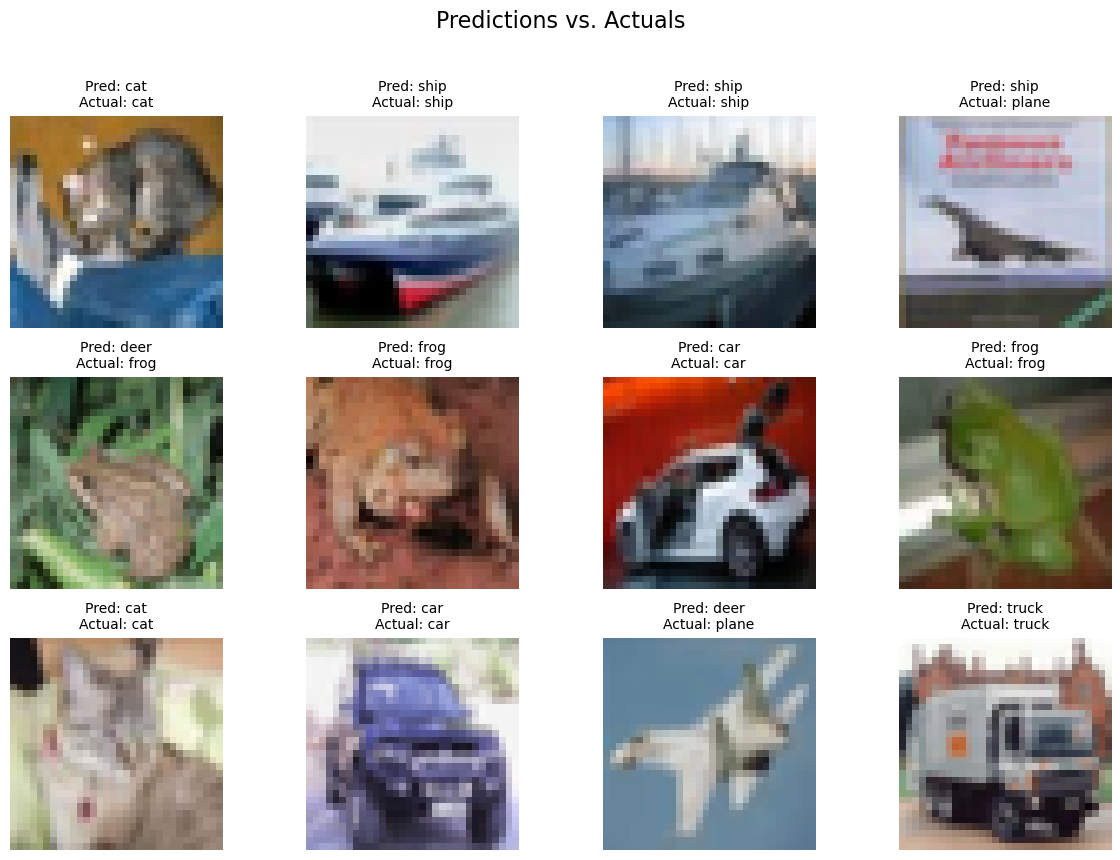

In [26]:
dataiter = iter(testloader)
images, labels = next(dataiter)

model.eval()
with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs, 1)

def unnormalize_img(img_tensor):
    return torch.permute(img_tensor / 2 + 0.5, (1, 2, 0))
    
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Predictions vs. Actuals', fontsize=16)

for i, ax in enumerate(axes.flat):
    if i >= len(images):
        break
    img_to_show = unnormalize_img(images[i].cpu())
    ax.imshow(img_to_show)
    ax.set_title(f"Pred: {classes[predicted[i]]}\nActual: {classes[labels[i]]}", fontsize=10)
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()